In [29]:
#Importar librerías
import pandas as pd
import os
import zipfile
import shutil
import ee
import requests
import zipfile
import io
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from skimage import exposure

In [2]:
try:
    os.chdir('D:/github/proyecto_infotec')
except:
    os.chdir('C:/users/claudio.pacheco/Documents/Github/proyecto_infotec')

In [19]:
os.chdir('datos/imagenes/')

In [4]:
def download_landsat_image(polygon_coords, start_date, end_date, state_name):
    #  Se incializa la API de Earth Engine
    ee.Initialize()

    # Polígono de interés

    polygon = ee.Geometry.Polygon(polygon_coords)

    # Colleción de imágenes de Landsat 8
    landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
                .filterDate(start_date, end_date) \
                .filterBounds(polygon) \
                .sort('CLOUD_COVER') \
                .first()

    # Parámetros de exportación. 
    export_params = {
        'image': landsat,
        'description': state_name +'Landsat_image',
        'scale': 30,
        'region': polygon
    }

    # Se genera la URL para descargar la imagen
    download_url = landsat.getDownloadURL(export_params)

    # Descarga de imagen
    r = requests.get(download_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(os.path.join(os.getcwd(),"datos/imagenes",state_name))


In [5]:
polygon_coords = {
    'oaxaca': [[[-96.503, 17.016], [-96.497, 17.016], [-96.497, 17.019], [-96.503, 17.019]]],
    "chiapas": [[[-92.501, 15.016], [-92.497, 15.016], [-92.497, 15.019], [-92.501, 15.019]]],
    "puebla": [[[-98.501, 19.016], [-98.497, 19.016], [-98.497, 19.019], [-98.501, 19.019]]],
    "guanajuato": [[[-101.501, 21.016], [-101.497, 21.016], [-101.497, 21.019], [-101.501, 21.019]]],
    "queretaro": [[[-99.501, 20.016], [-99.497, 20.016], [-99.497, 20.019], [-99.501, 20.019]]],
    "hidalgo": [[[-98.501, 20.016], [-98.497, 20.016], [-98.497, 20.019], [-98.501, 20.019]]],
    "michoacan": [[[-101.501, 19.016], [-101.497, 19.016], [-101.497, 19.019], [-101.501, 19.019]]],
    "san_luis_potosi": [[[-100.501, 22.016], [-100.497, 22.016], [-100.497, 22.019], [-100.501, 22.019]]],
    "veracruz": [[[-96.501, 18.016], [-96.497, 18.016], [-96.497, 18.019], [-96.501, 18.019]]],
    "yucatan": [[[-89.501, 21.016], [-89.497, 21.016], [-89.497, 21.019], [-89.501, 21.019]]],
    "tabasco": [[[-92.501, 18.016], [-92.497, 18.016], [-92.497, 18.019], [-92.501, 18.019]]],
    "campeche": [[[-91.501, 19.016], [-91.497, 19.016], [-91.497, 19.019], [-91.501, 19.019]]],
    "quintana_roo": [[[-88.501, 20.016], [-88.497, 20.016], [-88.497, 20.019], [-88.501, 20.019]]],
    "nuevo_leon": [[[-100.501, 25.016], [-100.497, 25.016], [-100.497, 25.019], [-100.501, 25.019]]],
    "tamaulipas": [[[-98.501, 25.016], [-98.497, 25.016], [-98.497, 25.019], [-98.501, 25.019]]],
    "sonora": [[[-109.501, 29.016], [-109.497, 29.016], [-109.497, 29.019], [-109.501, 29.019]]],
    "sinaloa": [[[-107.501, 26.016], [-107.497, 26.016], [-107.497, 26.019], [-107.501, 26.019]]],
    "nayarit": [[[-105.501, 21.016], [-105.497, 21.016], [-105.497, 21.019], [-105.501, 21.019]]],
    "jalisco": [[[-103.501, 20.016], [-103.497, 20.016], [-103.497, 20.019], [-103.501, 20.019]]],
    "colima": [[[-103.501, 19.016], [-103.497, 19.016], [-103.497, 19.019], [-103.501, 19.019]]],
    "aguascalientes": [[[-102.501, 21.016], [-102.497, 21.016], [-102.497, 21.019], [-102.501, 21.019]]],
    "zacatecas": [[[-102.501, 23.016], [-102.497, 23.016], [-102.497, 23.019], [-102.501, 23.019]]],
    "baja_california": [[[-114.501, 29.016], [-114.497, 29.016], [-114.497, 29.019], [-114.501, 29.019]]],
    "baja_california_sur": [[[-112.501, 25.016], [-112.497, 25.016], [-112.497, 25.019], [-112.501, 25.019]]],
    "durango": [[[-104.501, 24.016], [-104.497, 24.016], [-104.497, 24.019], [-104.501, 24.019]]],
    "coahuila": [[[-102.501, 26.016], [-102.497, 26.016], [-102.497, 26.019], [-102.501, 26.019]]],
    "chihuahua": [[[-107.501, 30.016], [-107.497, 30.016], [-107.497, 30.019], [-107.501, 30.019]]],
    "guerrero": [[[-99.501, 17.016], [-99.497, 17.016], [-99.497, 17.019], [-99.501, 17.019]]],
    "morelos": [[[-99.501, 19.016], [-99.497, 19.016], [-99.497, 19.019], [-99.501, 19.019]]],
    "mexico": [[[-99.501, 19.016], [-99.497, 19.016], [-99.497, 19.019], [-99.501, 19.019]]],
    "tlaxcala": [[[-98.501, 19.016], [-98.497, 19.016], [-98.497, 19.019], [-98.501, 19.019]]],
    "cdmx": [[[-99.501, 19.016], [-99.497, 19.016], [-99.497, 19.019], [-99.501, 19.019]]]
}


In [6]:
#Descargar imágenes de polygon_coords
for state_name, polygon_coord in polygon_coords.items():
    download_landsat_image(polygon_coord, '2020-01-01', '2020-12-31', state_name)

In [23]:
#Enlistar carpetas
folders = os.listdir('.')
#Enlistar imágenes de cada carpeta
images = []
for folder in folders:
    images.append(os.listdir(folder))

In [27]:
#utilizar una imagen para obtener crs y resolución
image = rasterio.open(folders[0] + '/' + images[0][0])
crs = image.crs
transform = image.transform

In [28]:
#Reproyectar imágenes
for folder, image in zip(folders, images):
    for img in image:
        with rasterio.open(folder + '/' + img) as src:
            data = src.read(
            out_shape=(
                src.count,
                int(src.height * 0.5),
                int(src.width * 0.5)
            ),
            resampling=rasterio.enums.Resampling.bilinear
        )
        transform = src.transform * src.transform.scale(
            (src.width / data.shape[-1]),
            (src.height / data.shape[-2])
        )
        with rasterio.open(folder + '/' + img, 'w', driver='GTiff', height=data.shape[1], width=data.shape[2], count=data.shape[0], dtype=data.dtype, crs=crs, transform=transform) as dst:
            dst.write(data)
            
            

In [90]:
#normalizar imágenes usando exposure.rescale_intensity
normalized_images = []
for folder, image in zip(folders, images):
    for img in image:
        normalized_images.append(exposure.rescale_intensity(rasterio.open(folder + '/' + img).read(1), out_range=(0, 1)).astype('float'))
 

In [91]:
normalized_images 

[array([[1.        , 0.65694582, 0.38799107, 0.34865674, 0.42696753,
         0.34034404, 0.13472852],
        [0.94275987, 0.51433384, 0.33411196, 0.40119061, 0.36631548,
         0.13250344, 0.13292612],
        [0.6861043 , 0.41894457, 0.41728333, 0.5393967 , 0.52916831,
         0.24295785, 0.26989615],
        [0.55402929, 0.3697947 , 0.43696526, 0.64681262, 0.67801481,
         0.63029146, 0.65483969],
        [0.35093519, 0.23754244, 0.31814563, 0.50617874, 0.52471817,
         0.67450112, 0.88905805],
        [0.03770839, 0.        , 0.31037381, 0.31204489, 0.29969811,
         0.51336122, 0.86364555]]),
 array([[1.        , 0.93635315, 0.93080801, 0.91538393, 0.8965463 ,
         0.89308554, 0.94566578],
        [0.8448627 , 0.84554702, 0.88947529, 0.89789915, 0.89930707,
         0.90729046, 0.96992266],
        [0.64508134, 0.70706862, 0.78723288, 0.80852455, 0.83537704,
         0.87356359, 0.94432867],
        [0.48251128, 0.5829289 , 0.69847172, 0.75919271, 0.79116559,
  

In [99]:
#Dejar solo los arreglos que sean 6,7
normalized_images = [x for x in normalized_images if x.shape == (6,7)]
normalized_images=np.array(normalized_images)

In [100]:
#Estadistica descriptiva de todo el arreglo
print('Media: ', np.mean(normalized_images), 'Desviación estándar: ', np.std(normalized_images), 'Mínimo: ', np.min(normalized_images), 'Máximo: ', np.max(normalized_images))

Media:  0.5157011056002818 Desviación estándar:  0.2935271251292457 Mínimo:  0.0 Máximo:  1.0


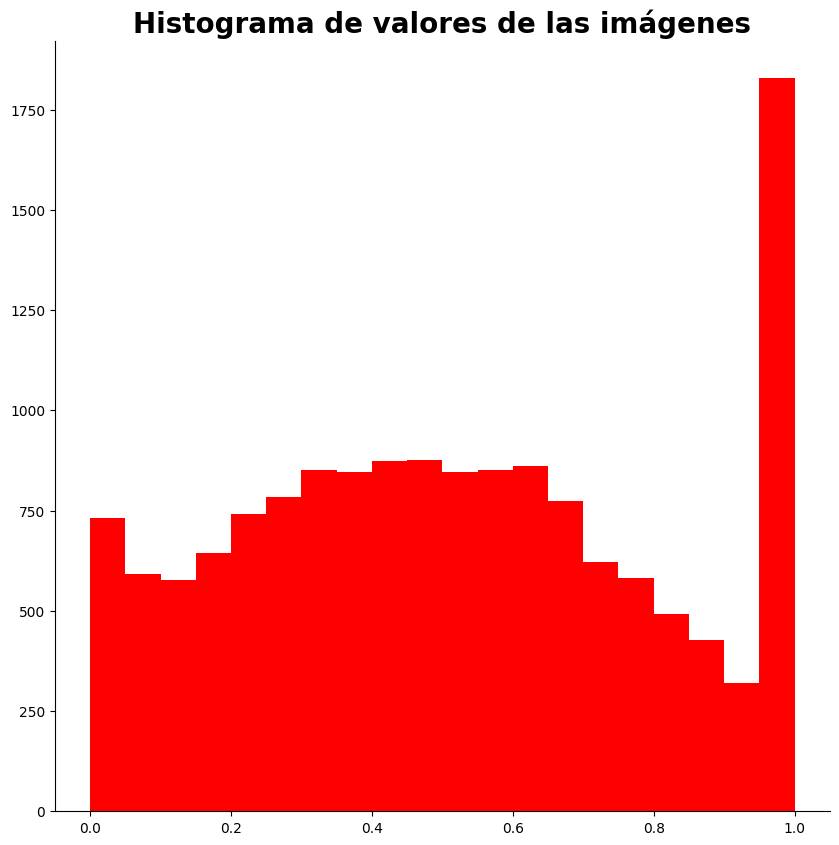

In [108]:
plt.figure(figsize=(10, 10))
plt.hist(normalized_images.flatten(), bins=20, color='red')
plt.title('Histograma de valores de las imágenes', fontsize=20, fontweight='bold')
#Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)